# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Ans: This data represents 17 marketing campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import time

In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
Bank Client Data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Perform Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Assessment:** No missing values that need to be handled.

Assess Numerical Columns

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


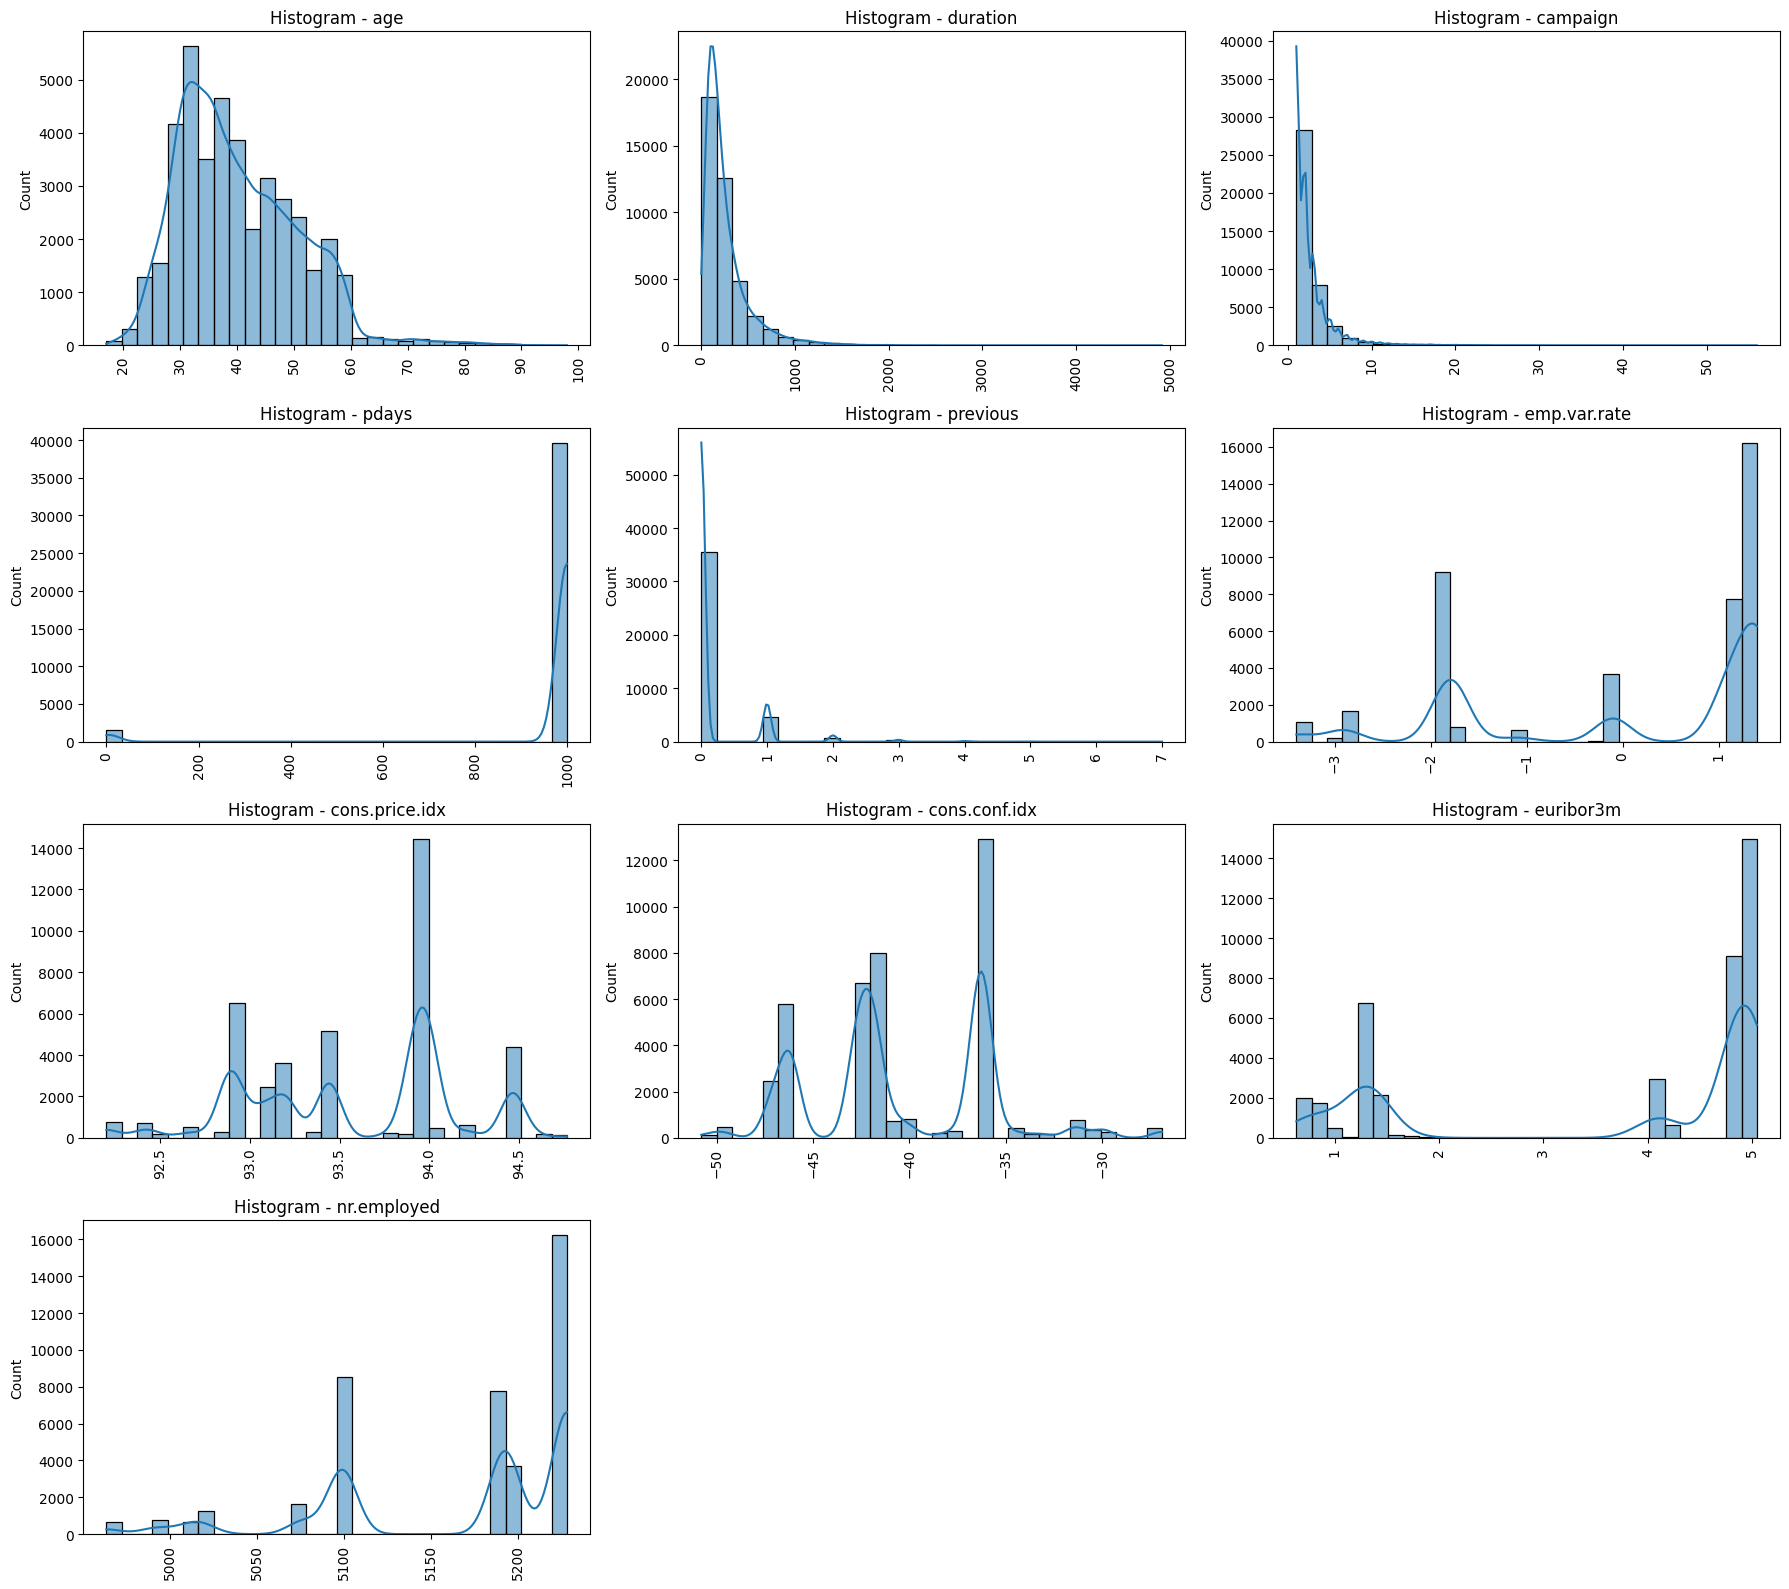

In [ ]:
# plot histograms of Numerical Columns

num_cols = df.select_dtypes(include = 'number').columns
n_cols = 3 # number of subplots per row
n_rows = math.ceil(len(num_cols) / n_cols) # number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize = (6 * n_cols, 4 * n_rows), squeeze = False)
axes = axes.flatten()  # flatten to 1D to simplify indexing

for i, col in enumerate(num_cols):
    sns.histplot(data = df, x = col, bins = 30, kde = True, ax = axes[i])
    axes[i].tick_params(axis = 'x', rotation = 90)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count')
    axes[i].set_title('Histogram - ' + col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j]) # remove unused subplots in grid

plt.tight_layout()
plt.savefig('images/Histogram - Numerical Columns.png')
plt.show()

**Assessment:** No obvious outliers nor incorrect data in the numerical columns.


Assess Categorical Columns

In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(df[col].value_counts(normalize = True))
    print("\n")

job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: proportion, dtype: float64


marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64


education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64


default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64


loan
no        

**Assessment:** Dataset is imbalanced, with 89% of target variable as 'no'.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:** The purpose is to leverage data-driven insights to increase the effectiveness of the bank’s directed marketing campaigns. By predicting which clients are most likely to accept a term deposit offer, the bank can enhance outreach efforts, improve customer engagement, and achieve higher conversion and profitability rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Data Preparation

In [ ]:
# identify numerical vs categorical columns for data transformation
target = 'y'
num_columns = df.select_dtypes(include = 'number').columns
cat_columns = df.select_dtypes(include = ['object', 'category']).columns.drop(target)

print(f'Target: ' + target)
print(f'Numerical Columns ({len(num_columns)}): {", ".join(num_columns)}')
print(f'Categorical Columns ({len(cat_columns)}): {", ".join(cat_columns)}')

Target: y
Numerical Columns (10): age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
Categorical Columns (10): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome


In [ ]:
# prepare data for modelling
X = df.drop([target], axis=1)
y = df[target]
print(X.head())
print(y.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994

In [ ]:
# define the preprocessor for X
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first'), cat_columns)
    ])

# apply the preprocessor to X
X = preprocessor.fit_transform(X)
print(X[:5])

[[ 1.53303429  0.01047142 -0.56592197  0.1954139  -0.34949428  0.64809227
   0.72272247  0.88644656  0.71245988  0.33167991  0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          0.          1.          0.        ]
 [ 1.62899323 -0.42150051 -0.56592197  0.1954139  -0.34949428  0.64809227
   0.72272247  0.88644656  0.71245988  0.33167991  0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          

In [ ]:
# encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:5])

[0 0 0 0 0]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Printing shapes of the sets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape,'\n')

X_train: (32950, 53)
X_test: (8238, 53)
y_train: (32950,)
y_test: (8238,) 



### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# use Dummy classifier to define baseline performance
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print('Dummy Classifier (Baseline) Accuracy:', f'{baseline_score:.6f}')

Dummy Classifier (Baseline) Accuracy: 0.886502


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
logR = LogisticRegression().fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
logR_score = logR.score(X_test, y_test)
print('Logistic Regression Accuracy:', f'{logR_score:.6f}')

Logistic Regression Accuracy: 0.911022


**Assessment:** Logistic Regression performs slightly better than the baseline model.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# define models with default hyperparameters
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state = 42),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}

results = []

for name, model in models.items():
    # record time for model fitting
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # evaluate on training and test sets
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # append results
    results.append([name, train_time, train_accuracy, test_accuracy])

In [ ]:
# Create the results DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# sort results from best to worst model
df_results = df_results.sort_values(by = "Test Accuracy", ascending = False)
df_results.reset_index(drop = True, inplace = True)

# print results
print(df_results.set_index('Model'))

                    Train Time  Train Accuracy  Test Accuracy
Model                                                        
SVM                  18.215822        0.921700       0.911143
LogisticRegression    0.704267        0.911927       0.911022
KNN                   0.010853        0.928619       0.903010
DecisionTree          0.288043        1.000000       0.886623


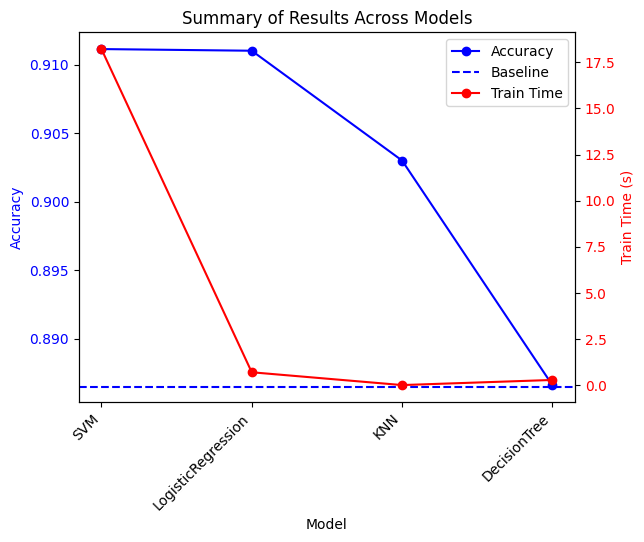

In [ ]:
# plot results
fig, ax1 = plt.subplots()

# Accuracy on left y-axis
ax1.plot(df_results['Model'], df_results['Test Accuracy'], marker = 'o', color = 'blue', label = 'Accuracy')
ax1.set_xlabel('Model')
plt.xticks(rotation = 45, ha = 'right')
ax1.set_ylabel('Accuracy', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# Train Time on right y-axis
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
ax2.plot(df_results['Model'], df_results['Train Time'], marker = 'o', color = 'red', label = 'Train Time')
ax2.set_ylabel('Train Time (s)', color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

# Add DummyClassifier baseline (dotted line)
ax1.axhline(y = baseline_score, color='blue', linestyle='--', linewidth=1.5, label = 'Baseline')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Summary of Results Across Models')
plt.savefig('images/Summary of Results Across Models (default)')
plt.show()

**Assessment:**  
**Accuracy:**  
- All four models outperformed the DummyClassifier baseline.
- SVM achieved the highest accuracy, with Logistic Regression showing comparable results.
- KNN ranked third, while the Decision Tree performed the weakest.
- The Decision Tree model showed signs of overfitting, achieving 100% training accuracy but only baseline-level test accuracy.
  
**Train Time:**  
- SVM required the longest training time, consistent with its higher computational complexity.
- The other three models (KNN, Logistic Regression, and Decision Tree) trained significantly faster and had similar training durations.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# define models and hyperparameters
modelsGrid = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'DecisionTree': (DecisionTreeClassifier(random_state = 42), {'max_depth': [5, 10, 15]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10]})
}

resultsGrid = []

for name, (model, params) in modelsGrid.items():

    # record time for model fitting
    start_time = time.time()

    # Perform grid search
    grid = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
    grid.fit(X_train, y_train)

    train_time = (time.time() - start_time) / len(grid.cv_results_['mean_fit_time'])

    # get best estimator
    best_model = grid.best_estimator_
    print(best_model)

    # evaluate on training and test sets
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)

    # append results
    resultsGrid.append([name, train_time, train_accuracy, test_accuracy])

KNeighborsClassifier(n_neighbors=7)
DecisionTreeClassifier(max_depth=5, random_state=42)
LogisticRegression(C=1)
SVC(C=1)


In [ ]:
# Create the results DataFrame
df_results = pd.DataFrame(resultsGrid, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# sort results from best to worst model
df_results = df_results.sort_values(by = "Test Accuracy", ascending = False)
df_results.reset_index(drop = True, inplace = True)

# print results
print(df_results.set_index('Model'))

                    Train Time  Train Accuracy  Test Accuracy
Model                                                        
DecisionTree          0.734582        0.917420       0.915028
SVM                  90.475946        0.921700       0.911143
LogisticRegression    1.100164        0.911927       0.911022
KNN                   8.017281        0.924188       0.904588


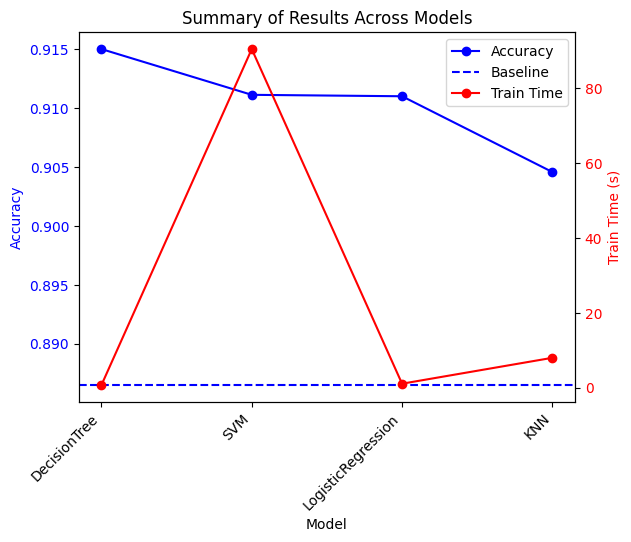

In [ ]:
# plot results
fig, ax1 = plt.subplots()

# Accuracy on left y-axis
ax1.plot(df_results['Model'], df_results['Test Accuracy'], marker = 'o', color = 'blue', label = 'Accuracy')
ax1.set_xlabel('Model')
plt.xticks(rotation = 45, ha = 'right')
ax1.set_ylabel('Accuracy', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# Train Time on right y-axis
ax2 = ax1.twinx()  # create a second y-axis sharing the same x-axis
ax2.plot(df_results['Model'], df_results['Train Time'], marker = 'o', color = 'red', label = 'Train Time')
ax2.set_ylabel('Train Time (s)', color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

# Add DummyClassifier baseline (dotted line)
ax1.axhline(y = baseline_score, color='blue', linestyle='--', linewidth=1.5, label = 'Baseline')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Summary of Results Across Models')
plt.savefig('images/Summary of Results Across Models (GS)')
plt.show()

**Assessment:**   
**Accuracy:**
- Both Decision Tree and KNN models showed improved test accuracy after applying GridSearch.
- The Decision Tree no longer achieved 100% training accuracy, indicating a reduction in overfitting.
- Logistic Regression and SVM achieved the same accuracy to their default hyperparameter results, suggesting no improvement from tuning.
- Decision Tree performed the best overall.
- SVM and Logistic Regression had comparable performance, while KNN performed the weakest.

**Train Time:**
- Average training time increased for all models due to the GridSearch process evaluating multiple parameter combinations, some of which took longer.
- SVM remained the slowest to train, consistent with results from the default settings.
- The longer training time for SVM is expected, given its computational complexity and the large dataset size.